In [1]:
# بارگذاری دیتاست

from sklearn.datasets import fetch_openml
import pandas as pd
dataset = fetch_openml(data_id = 560 , as_frame =True)
df = dataset.frame
df.head(5)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [2]:
# تغییر نام ستون اخر

df = df.rename(columns={'class':'target'})
df.columns

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target'],
      dtype='object')

In [3]:
# کاوش داده ها

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  target   252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Hip'}>],
       [<Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

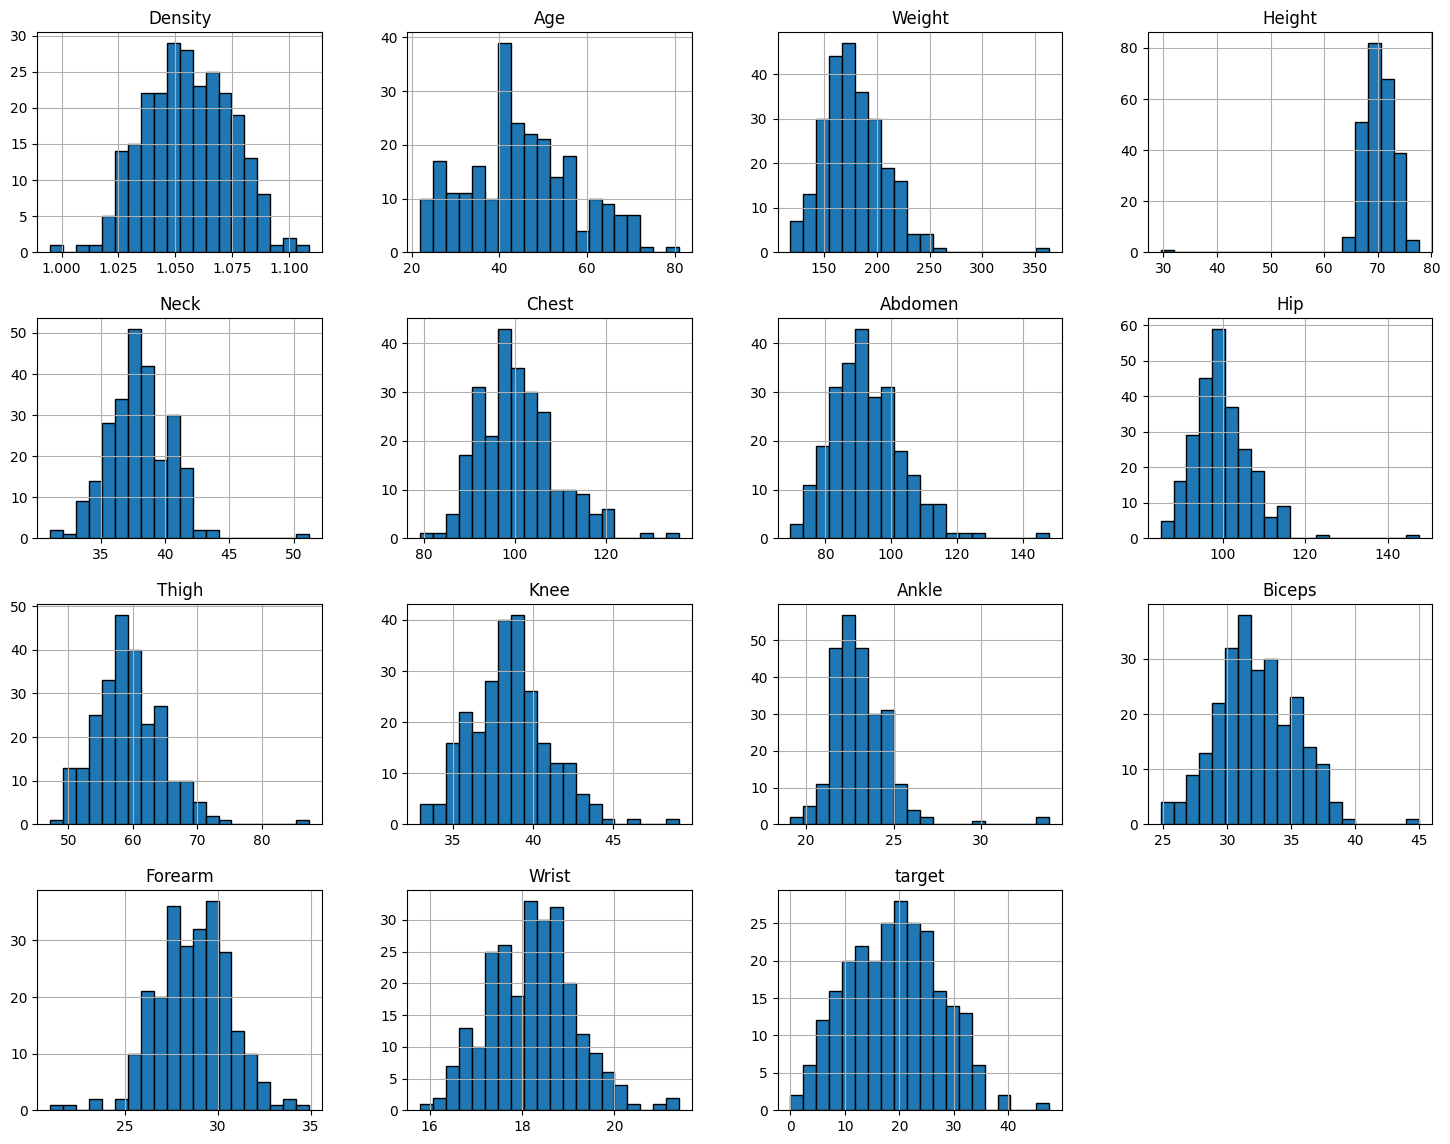

In [4]:
# بررسی و کاوش داده ها و تشخیص وضعیت چولگی

import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(18, 14), edgecolor='black')

array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Hip'}>],
       [<Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

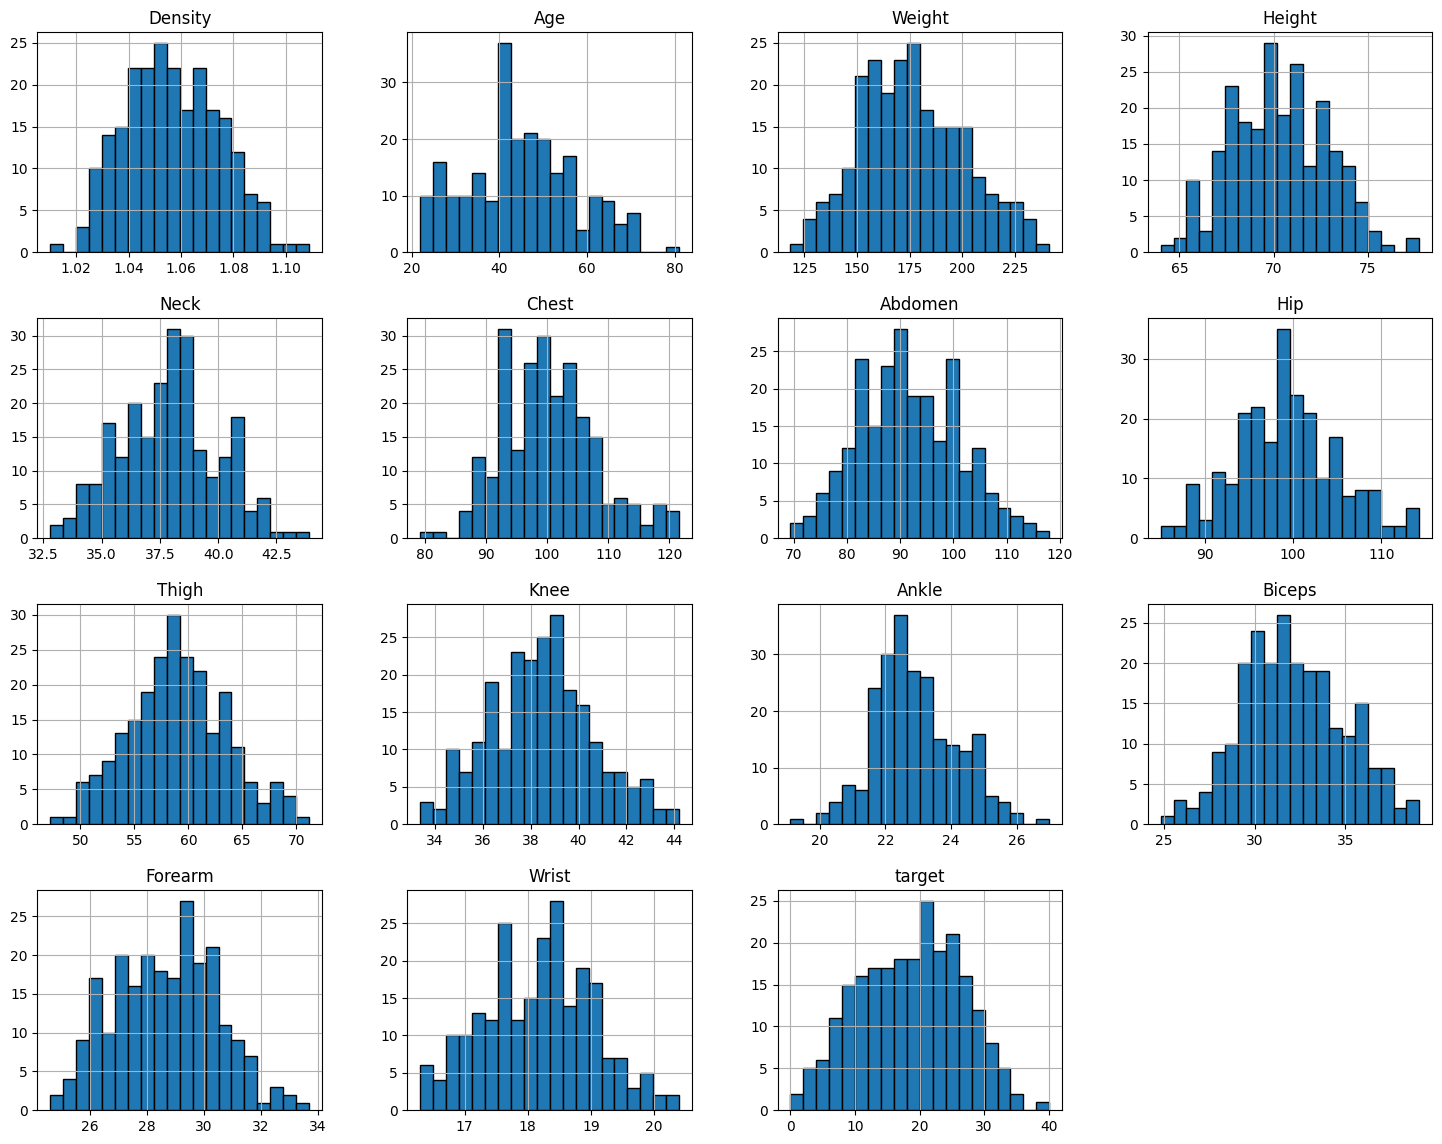

In [5]:
# حذف داده های پرت

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df_clean = df[~outliers.any(axis=1)]
df_clean.hist(bins=20, figsize=(18, 14), edgecolor='black')

In [6]:
# ساخت ویژگی های جدید و کاهش ابعداد
# چون وزن بر حسب پوند هست و قد بر حسب اینج فرمول اینجوری میشه

df_clean['BMI'] = (df_clean['Weight'] * 703) / (df_clean['Height'] ** 2)

# حذف ستون قد و وزن

df_clean.drop(['Weight', 'Height'], axis=1, inplace=True)
df_clean.head(5)

<ipython-input-6-0f3125632059>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['BMI'] = (df_clean['Weight'] * 703) / (df_clean['Height'] ** 2)
<ipython-input-6-0f3125632059>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['Weight', 'Height'], axis=1, inplace=True)


,Density,Age,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target,BMI
0,1.0708,23,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3,23.624460
1,1.0853,22,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1,23.332048
2,1.0414,22,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3,24.666315
3,1.0751,26,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4,24.880784
4,1.0340,24,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7,25.514854


In [7]:
# تقسیم داده ها به تست و ترین

from sklearn.model_selection import train_test_split

x = df_clean.drop(columns='target')     # ویژگی‌ها (DataFrame)
y = df_clean['target']                  # متغیر هدف (Series)

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

**lasso**

In [8]:
# ساخت پایپ لاین و انتخاب مدل
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

pipe = Pipeline([
    ('scaler' , StandardScaler()),
    ('model',Lasso())
])

In [24]:
# هایپرپارامتر
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [18]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae , mse, rmse , r2

(0.484204340346341,
 0.6471301714957023,
 np.float64(0.8044440138976126),
 0.9893138523533347)

In [23]:
grid.best_params_['model__alpha']

0.1

In [28]:
best_model = grid.best_estimator_.named_steps['model']
feature_names = x_train.columns
coefficients = best_model.coef_
importance = pd.Series(coefficients, index=feature_names)
importance = importance.sort_values(key=abs, ascending=False)
importance

,0
Density,-7.142434
Abdomen,0.563600
Chest,0.106890
Age,0.060250
Neck,0.000000
Hip,0.000000
Thigh,0.000000
Knee,0.000000
Ankle,-0.000000
Biceps,-0.000000


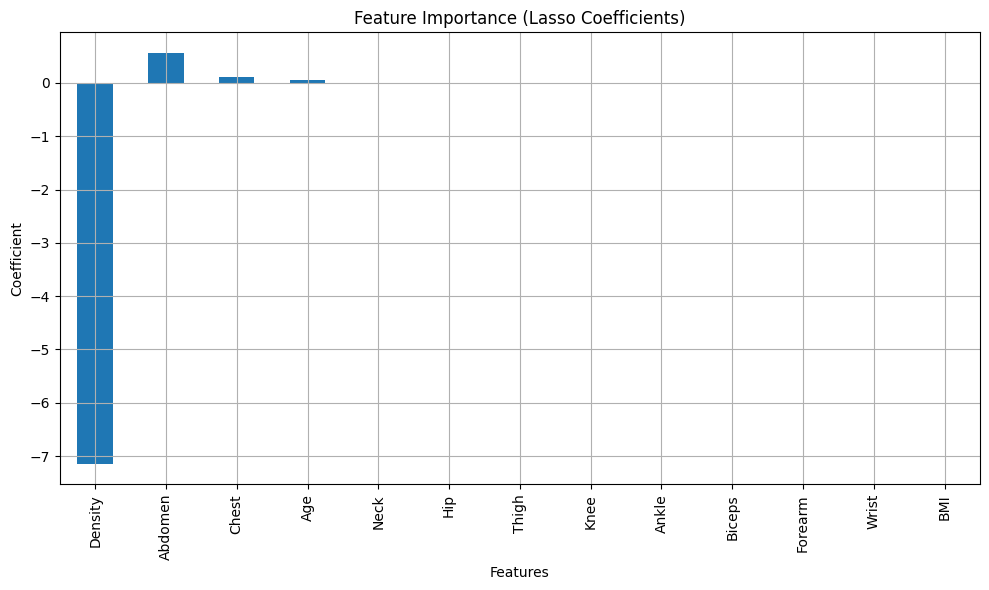

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importance (Lasso Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.grid(True)
plt.tight_layout()

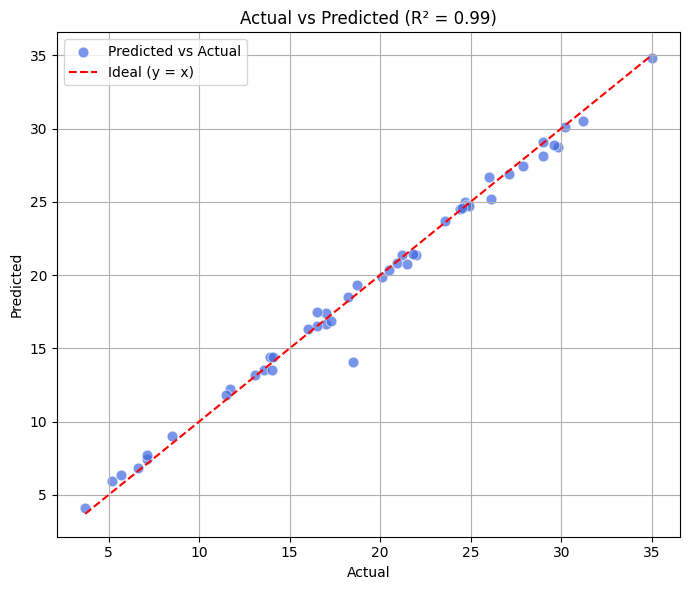

In [30]:
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', alpha=0.7, s=60, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (y = x)')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted (R² = {r2:.2f})")
plt.legend(loc='upper left')  # یا loc='best'
plt.grid(True)
plt.tight_layout()

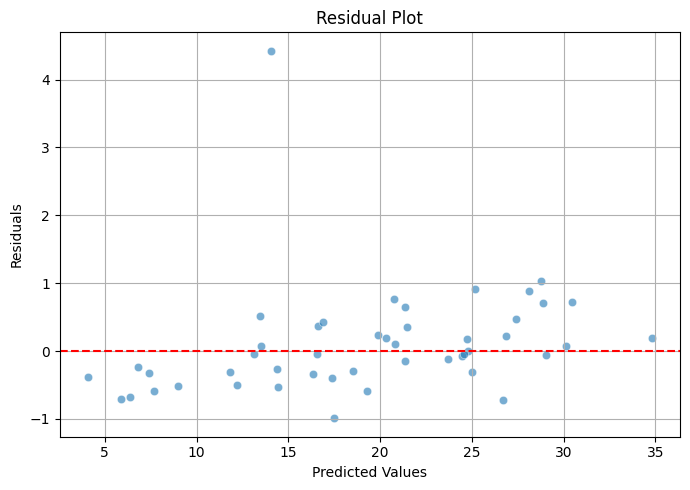

In [31]:
# تحلیل residuals
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()

**ridge**

In [33]:
from sklearn.linear_model import Ridge
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

In [35]:
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae , mse, rmse , r2

(0.484204340346341,
 0.6471301714957023,
 np.float64(0.8044440138976126),
 0.9893138523533347)

In [38]:
ridge_model = grid.best_estimator_.named_steps['model']
coefficients = ridge_model.coef_
importance = pd.Series(coefficients, index=x_train.columns).sort_values(key=abs, ascending=False)
importance

,0
Density,-7.226870
Abdomen,0.381763
Chest,0.357532
Ankle,-0.259347
Hip,0.210222
BMI,-0.173059
Age,0.104195
Biceps,-0.104136
Knee,0.098038
Neck,0.068403


In [42]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000)
}

param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

results = {}

In [55]:
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    grid = GridSearchCV(pipe, param_grid, scoring='r2', cv=5, n_jobs=-1)
    grid.fit(x_train, y_train)

    y_pred = grid.predict(x_test)
    results[name] = {
        'model': grid.best_estimator_,
        'alpha': grid.best_params_['model__alpha'],
        'r2': r2_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'coef': grid.best_estimator_.named_steps['model'].coef_
    }
    print("\n" + name + " Regression Results")
    print("------------------------")
    print("Best alpha:", results[name]['alpha'])
    print("R2 Score  :", round(results[name]['r2'], 4))
    print("MSE       :", round(results[name]['mse'], 4))
    print("MAE       :", round(results[name]['mae'], 4))


Ridge Regression Results
------------------------
Best alpha: 0.1
R2 Score  : 0.9898
MSE       : 0.6176
MAE       : 0.4735

Lasso Regression Results
------------------------
Best alpha: 0.1
R2 Score  : 0.9893
MSE       : 0.6471
MAE       : 0.4842


elasticNet

In [56]:
from sklearn.linear_model import ElasticNet

In [57]:
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet(max_iter=10000))
])

In [58]:
param_grid_elastic = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
grid_elastic = GridSearchCV(
    estimator=elastic_pipeline,
    param_grid=param_grid_elastic,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

In [59]:
grid_elastic.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', ElasticNet(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10, 100],
                         'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='r2')

In [61]:
y_pred_elastic = grid_elastic.predict(x_test)

print("ElasticNet Regression Results")
print("-----------------------------")
print("Best alpha     :", grid_elastic.best_params_['model__alpha'])
print("Best l1_ratio  :", grid_elastic.best_params_['model__l1_ratio'])
print("R2 Score       :", round(r2_score(y_test, y_pred_elastic), 4))
print("MSE            :", round(mean_squared_error(y_test, y_pred_elastic), 4))
print("MAE            :", round(mean_absolute_error(y_test, y_pred_elastic), 4))

ElasticNet Regression Results
-----------------------------
Best alpha     : 0.1
Best l1_ratio  : 0.9
R2 Score       : 0.9878
MSE            : 0.7373
MAE            : 0.5498


In [67]:
elastic_best_model = grid_elastic.best_estimator_.named_steps['model']
elastic_coeffs = elastic_best_model.coef_

importance_elastic = pd.Series(elastic_coeffs, index=x_train.columns).sort_values(key=abs, ascending=False)
importance_elastic

,0
Density,-6.971121
Abdomen,0.717037
Chest,0.095722
Age,0.073911
Ankle,-0.024456
Neck,0.000000
Hip,0.000000
Thigh,0.000000
Knee,0.000000
Biceps,-0.000000


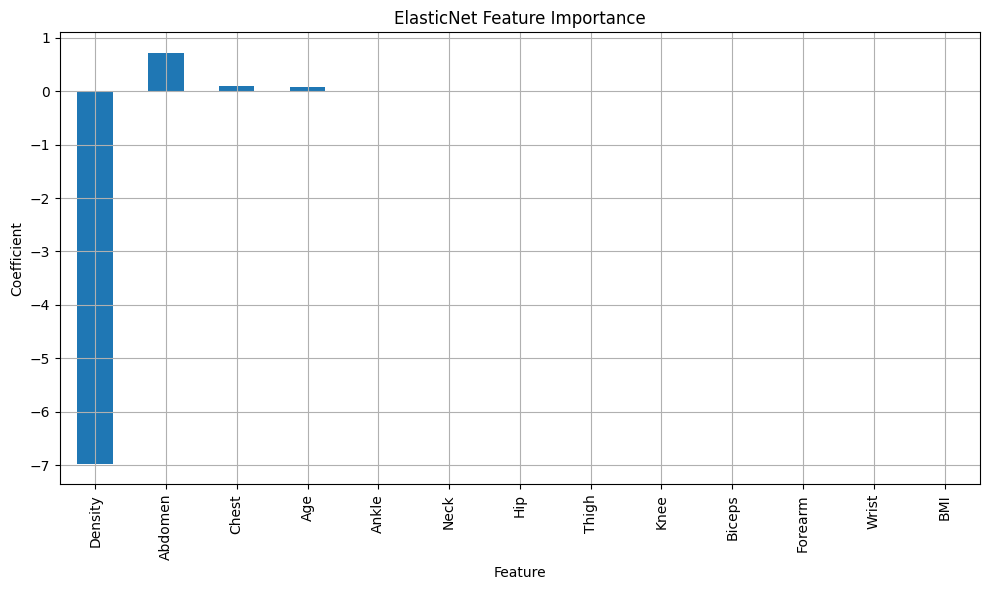

In [68]:
importance_elastic.plot(kind='bar', figsize=(10,6))

plt.title('ElasticNet Feature Importance')
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.grid(True)
plt.tight_layout()

In [ ]:
import joblib
joblib.dump(pipe, 'lasso_ridge_ealsticnet')